# Analyse Vente

In [1]:
import os
import pandas as pd

In [2]:
#dataset collection
files=[file for file in os.listdir(r'C:/Users/zaido/Downloads/project/project')] 
for file in files :
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path=(r'C:/Users/zaido/Downloads/project/project')
all_data=pd.DataFrame()
for file in files :
    current_data=pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data, current_data])

all_data.head()
all_data.shape
all_data.describe() #affiche derniere instruction

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [4]:
all_data.shape

(186850, 6)

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
all_data=all_data.dropna(how='all')
all_data.shape

(186305, 6)

In [9]:
all_data["Price Each"].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [10]:
all_data["Quantity Ordered"].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [11]:
all_data=all_data[all_data['Quantity Ordered'] !="Quantity Ordered" ]
all_data['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [12]:
all_data=all_data[all_data['Price Each'] !="Price Each" ]
all_data['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [13]:
all_data["Quantity Ordered"]=all_data["Quantity Ordered"].astype(float)

In [14]:
all_data["Price Each"]=all_data["Price Each"].astype(float)

In [15]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [17]:
def extract(date):
    first_two_numbers = date[:2]
    return first_two_numbers
x = "04/19/19"
result = extract(x)
print(result)

04


In [18]:
all_data['month'] = all_data['Order Date'].apply(extract)

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04


In [20]:
all_data["month"]=all_data["month"].astype(float)
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Sales               float64
month               float64
dtype: object

In [21]:
all_data['month'].unique()

array([ 4.,  5.,  8.,  9., 12.,  1.,  2.,  3.,  7.,  6., 11., 10.])

In [22]:
all_data_month = pd.DataFrame(all_data.groupby('month')['Sales'].sum())
all_data_month

,Sales
month,
1.0,1822256.73
2.0,2202022.42
3.0,2807100.38
4.0,3390670.24
5.0,3152606.75
6.0,2577802.26
7.0,2647775.76
8.0,2244467.88
9.0,2097560.13


Text(0.5, 0, 'Month number')

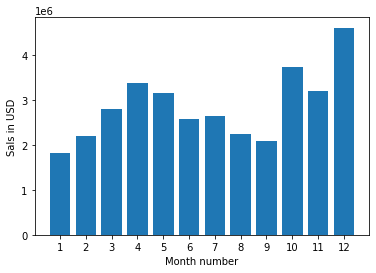

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(all_data_month.index , all_data_month['Sales'])
plt.xticks(all_data_month. index)
plt.ylabel('Sals in USD')
plt.xlabel( 'Month number')

In [45]:
# pie chart
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px

fig = px.pie(all_data_month, values=all_data_month['Sales'] , names=all_data_month.index)
fig.update_traces(textposition='inside', textinfo='percent+label')

In [25]:
import plotly.express as px

fig = px.histogram(all_data_month, x=all_data_month.index, y='Sales', color=all_data_month.index)
fig.update_layout(
    title_text='Month Command', #title of plot
    xaxis_title_text='Total Price', #xaxis label
    yaxis_title_text='Month', #yaxis label
    bargap=0.2, #longueur
    bargroupgap=0.2 #largeur
)
fig.show()

In [26]:
def region(x):
    return x.split(',')[1]
all_data['city'] = all_data['Purchase Address'].apply(region)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4.0,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4.0,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4.0,Los Angeles


In [27]:
all_data_cite=pd.DataFrame(all_data.groupby("city")["city"].count().sort_values(ascending=False))
#calculer nb d"occurences
all_data_cite

,city
city,
San Francisco,44732
Los Angeles,29605
New York City,24876
Boston,19934
Atlanta,14881
Dallas,14820
Seattle,14732
Portland,12465
Austin,9905


In [28]:
all_data_cite['city'].values

array([44732, 29605, 24876, 19934, 14881, 14820, 14732, 12465,  9905],
      dtype=int64)

In [29]:
fig = px.pie(all_data_cite, values=all_data_cite['city'], names=all_data_cite.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='City Population')
fig.show()

In [30]:
fig=px.histogram(y=all_data_cite.index,x=all_data_cite['city'],color=all_data_cite.index)
fig.update_layout(
title_text='city',
xaxis_title_text='nmbre de commandes',
yaxis_title_text='city',
bargap=0.2 ,
bargroupgap=0.2)

In [31]:
def hour(x):
    a= x.split(' ')[1]
    b = a.split(':')[0]
    return (b)

all_data['hour']=pd.to_datetime(all_data['Order Date']).dt.hour
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month,city,hour
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4.0,Dallas,8
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4.0,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4.0,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9.0,Los Angeles,20
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9.0,San Francisco,16
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9.0,San Francisco,7
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9.0,San Francisco,17


In [32]:
#.sort_values( )pour Les trier
heure_data=pd.DataFrame(all_data.groupby('hour')['hour'].count())
heure_data.rename(columns=({'heure':'commond_hour'}), inplace=True)
heure_data

,hour
hour,
0,3910
1,2350
2,1243
3,831
4,854
5,1321
6,2482
7,4011
8,6256


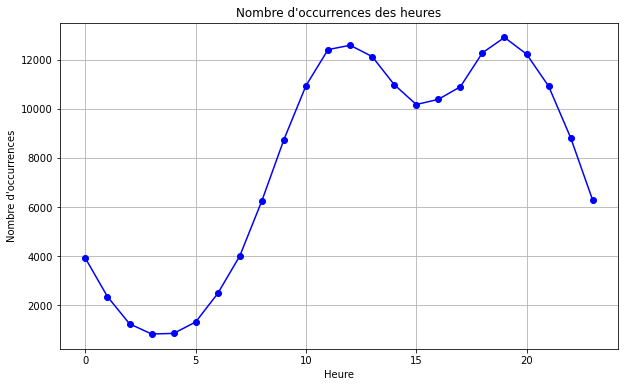

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
occurrences = all_data['hour'].value_counts().sort_index()
heures = occurrences.index.tolist()
nombre_occurrences = occurrences.values.tolist()
plt.figure(figsize=(10, 6))
plt.plot(heures, nombre_occurrences, marker='o', linestyle='-', color='b')
plt.xlabel('Heure')
plt.ylabel('Nombre d\'occurrences')
plt.title('Nombre d\'occurrences des heures')
plt.grid(True)
plt.show()
#toujours courbe comme cela si on a des valeurs périodiques (dans notre cas en heures) (pas bar c faux)
#, pour qu'on puisse voir les pics

In [38]:
# Group the data by "Product" and sum the "Quantity Ordered" column
most_sold = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sort the DataFrame in descending order based on the Quantity Ordered column
most_sold = most_sold.sort_values('Quantity Ordered', ascending=False)

most_sold

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017.0
4,AA Batteries (4-pack),27635.0
15,USB-C Charging Cable,23975.0
12,Lightning Charging Cable,23217.0
17,Wired Headphones,20557.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
2,27in FHD Monitor,7550.0
18,iPhone,6849.0
1,27in 4K Gaming Monitor,6244.0


In [40]:
price = all_data.groupby('Product')['Price Each'].mean().reset_index() 
#moyenne pour voir car il y a repetition des mêmes produits dans le tab #li yetbe3ou a9al houma l aghla
price = price.sort_values('Price Each', ascending=False)
price

,Product,Price Each
13,Macbook Pro Laptop,1700.00
14,ThinkPad Laptop,999.99
18,iPhone,700.00
10,LG Dryer,600.00
11,LG Washing Machine,600.00
9,Google Phone,600.00
16,Vareebadd Phone,400.00
1,27in 4K Gaming Monitor,389.99
3,34in Ultrawide Monitor,379.99
8,Flatscreen TV,300.00


C:\Users\zaido\AppData\Local\Temp\ipykernel_9644\4113006553.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

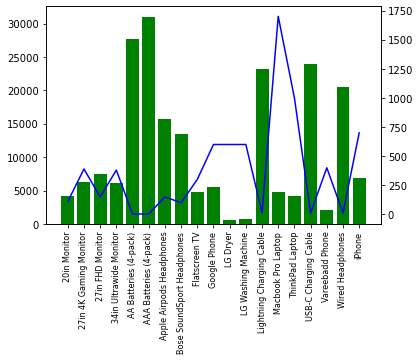

In [44]:
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
most_sold = all_data.groupby('Product')['Quantity Ordered'].sum().index
price = all_data.groupby('Product')['Price Each'].mean()
plt.figure(figsize=(40, 24))
fig , ax1=plt.subplots()
ax2=ax1.twinx( )# pour eviter d'ecrire le code
ax1.bar(most_sold, quantity , color='g')
ax2.plot(most_sold , price , "b-" )
ax1.set_xticklabels(most_sold , rotation="vertical" , size=8)